In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs #has coordinate reference systems
import cartopy.feature as cf #has some good basemaps
%matplotlib inline

In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is F01C-7D45

 Directory of C:\Users\Miya\Documents\GeoHackWeek2018\tutorial_contents\visualization\notebooks

09/13/2018  09:35 AM    <DIR>          .
09/13/2018  09:35 AM    <DIR>          ..
09/13/2018  09:34 AM    <DIR>          .ipynb_checkpoints
09/10/2018  01:50 PM             8,561 animation_tools.py
09/13/2018  09:31 AM         1,240,424 cartopyProjections.ipynb
09/10/2018  01:50 PM           886,214 Chile2010_tsunami.ipynb
09/10/2018  01:50 PM         1,598,895 Crescent_City_Inundation.ipynb
09/10/2018  01:50 PM             2,125 data_tools.py
09/10/2018  01:50 PM    <DIR>          figures
09/10/2018  01:50 PM           415,063 foliumTutorial.ipynb
09/13/2018  09:35 AM             1,082 MappingAShapefile.ipynb
               7 File(s)      4,152,364 bytes
               4 Dir(s)  356,039,876,608 bytes free


In [8]:
parks = gpd.read_file("../data/nps") 
type(parks) 

geopandas.geodataframe.GeoDataFrame

In [9]:
parks.head()

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
0,2006/03/09,None,POC for this update: richard_menicke@nps.gov ...,None,None,None,GLAC,Glacier,National Park,1604373,None,"POLYGON ((-114.4755159847537 49.0009136904987,..."
1,None,None,Shifted 0.04 miles,None,None,None,CANY,Canyonlands,National Park,1604382,None,(POLYGON ((-109.8856200129457 38.4854254669334...
2,None,None,Shifted 0.06 miles,None,None,None,NOCA,North Cascades,National Park,1604517,None,(POLYGON ((-121.3776115871471 48.6357360079056...
3,2008/01/08,None,Lands,None,None,None,KOVA,Kobuk Valley,National Park,1604524,None,POLYGON ((-159.5027878412329 67.80979011213896...
4,2008/01/08,None,Lands,None,None,None,LACL,Lake Clark,National Park,1604526,None,(POLYGON ((-152.8508309821284 60.2380394475578...


In [21]:
olympic = parks[parks.UNIT_NAME =="Olympic"] #grab olympic national park from the greater shapefile
olympic

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
42,None,None,Shifted 0.06 - 0.07 miles,None,None,None,OLYM,Olympic,National Park,6749476,None,(POLYGON ((-124.064131454841 47.59871223923516...


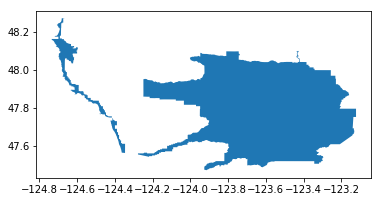

In [27]:
olympic.plot()

C:\Users\Miya\Miniconda3\Lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


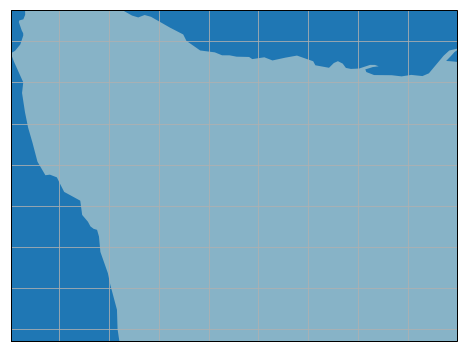

In [32]:
fig = plt.figure(figsize=(8,8)) #initiate figure and specify size
ax = plt.axes(projection = ccrs.Mercator()) #specify projection of axes
ax.add_geometries(olympic.geometry, crs=ccrs.PlateCarree()) #you have to specify the crs of your data

#if you have your own geometry in a shapefile it uses add_geometries

#above would show the full extent of the world, so we have to set bounds
bounds = olympic.total_bounds #this gives an array of the min and max x and y coordinates of olympic
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
ax.gridlines()
#ax.add_feature(cf.COASTLINE)

land = cf.NaturalEarthFeature(
    category='physical',
    name= 'land',
    scale='10m', #this is all really needs to work but you can specify extra things
    facecolor = cf.COLORS['land'], #use colors dictionary from cartopy to land color
    alpha = 0.5) #opacity is 0.5
    
ax.add_feature(land) #used the cartopy to generate the land so use add_feature instead of add_geometry    
    #high resolution dataset that has a bunch of earthly features

Text(449087,5.29429e+06,'Mt. Olympus')

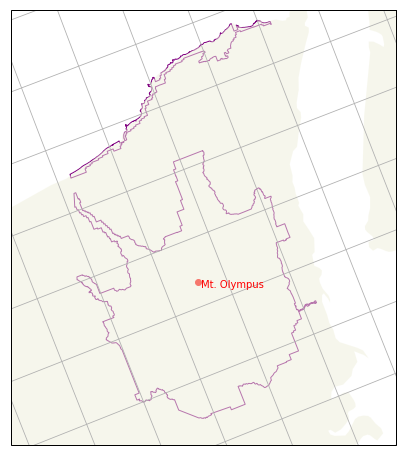

In [35]:
fig = plt.figure(figsize=(8,8)) #initiate figure and specify size
ax = plt.axes(projection = ccrs.AlbersEqualArea()) #specify projection of axes
ax.add_geometries(olympic.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor = 'purple') #you have to specify the crs of your data

#if you have your own geometry in a shapefile it uses add_geometries

#above would show the full extent of the world, so we have to set bounds
bounds = olympic.total_bounds #this gives an array of the min and max x and y coordinates of olympic
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
ax.gridlines()
#ax.add_feature(cf.COASTLINE)

land = cf.NaturalEarthFeature(
    category='physical',
    name= 'land',
    scale='10m', #this is all really needs to work but you can specify extra things
    facecolor = cf.COLORS['land'], #use colors dictionary from cartopy to land color
    alpha = 0.5) #opacity is 0.5
    
ax.add_feature(land) #used the cartopy to generate the land so use add_feature instead of add_geometry    
    #high resolution dataset that has a bunch of earthly features

ax.scatter(447087.3, 5294290.9, transform = ccrs.UTM(10), color='red') #add scatter
ax.text(447087.3 + 2000, 5294290.9, "Mt. Olympus", transform = ccrs.UTM(10), color='red') #add text